# Thực hiện phương pháp phát hiện biên bằng các toán tử Sobel, Prewitt, và Robert. Cho biết đặc điểm của từng toán tử.

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('coca.jpg', cv2.IMREAD_GRAYSCALE)  
img = img.astype(float)  



# đặc điểm :
## Phù hợp cho các biên mảnh và chi tiết nhỏ, vì hệ số trọng số trung tâm là 2 giúp tăng cường phát hiện biên.

In [5]:
def prewitt_operator(img):
    gx = np.zeros_like(img)
    gy = np.zeros_like(img)
    img_final = np.zeros_like(img)

    for i in range(1, img.shape[0]-1):
        for j in range(1, img.shape[1]-1):
            gx[i][j] = (-1*img[i - 1][j - 1] + 1*img[i - 1][j + 1]) + \
                        (-1*img[i][j - 1] + 1*img[i][j + 1]) + \
                        (-1*img[i + 1][j - 1] + 1*img[i + 1][j + 1])
            gy[i][j] = (img[i - 1][j - 1] + img[i - 1][j] + img[i - 1][j + 1]) - \
                        (img[i + 1][j - 1] + img[i + 1][j] + img[i + 1][j + 1])
            img_final[i][j] = np.clip(np.sqrt(gx[i][j]**2 + gy[i][j]**2), 0, 255)

    return img_final

# Prewitt cũng sử dụng kernel 3x3, nhưng không có hệ số trọng số (hệ số là 1), vì vậy nó nhạy cảm với các biến đổi nhỏ và phát hiện biên kém nhạy hơn Sobel.

In [6]:

def roberts_operator(img):
    gx = np.zeros_like(img)
    gy = np.zeros_like(img)
    img_final = np.zeros_like(img)

    for i in range(0, img.shape[0]-1):
        for j in range(0, img.shape[1]-1):
            gx[i][j] = img[i][j] - img[i + 1][j + 1]
            gy[i][j] = img[i + 1][j] - img[i][j + 1]
            img_final[i][j] = np.clip(np.sqrt(gx[i][j]**2 + gy[i][j]**2), 0, 255)

    return img_final


# Sử dụng mặt nạ 2x2, rất nhỏ gọn và nhạy cảm với các biến đổi sắc nét, thích hợp cho phát hiện biên mảnh và rất sắc nét.

In [7]:
sobel_result = sobel_operator(img)
prewitt_result = prewitt_operator(img)
roberts_result = roberts_operator(img)

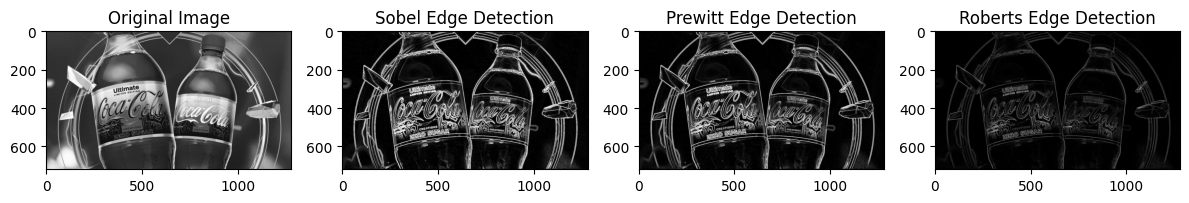

In [8]:


plt.figure(figsize=(12, 8))
plt.subplot(1, 4, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')

plt.subplot(1, 4, 2)
plt.title("Sobel Edge Detection")
plt.imshow(sobel_result, cmap='gray')

plt.subplot(1, 4, 3)
plt.title("Prewitt Edge Detection")
plt.imshow(prewitt_result, cmap='gray')

plt.subplot(1, 4, 4)
plt.title("Roberts Edge Detection")
plt.imshow(roberts_result, cmap='gray')

plt.tight_layout()
plt.show()